<a href="https://colab.research.google.com/github/riyamishra28/Health-Status-Prediction/blob/main/Riya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Define ranges for age, BMI, and activity level
np.random.seed(42)  # For reproducibility
ages = np.random.randint(18, 71, 1000)  # 1000 samples
bmis = np.random.uniform(15, 40, 1000)
activity_levels = np.random.uniform(0, 10, 1000)

# Define health status rules
def classify_health(age, bmi, activity):
    if bmi < 18.5 and activity > 5:
        return "Underweight"
    elif 18.5 <= bmi < 25 and activity >= 7 and age <= 35:
        return "Healthy"
    elif 25 <= bmi < 30 and activity >= 5:
        return "Overweight"
    elif bmi >= 30 and age > 35:
        return "Moderately Obese" if age <= 60 else "Severely Obese"
    else:
        return "Healthy"

# Apply rules to classify health status
health_statuses = [classify_health(age, bmi, activity) for age, bmi, activity in zip(ages, bmis, activity_levels)]

# Create a DataFrame
data = pd.DataFrame({
    "Age": ages,
    "BMI": bmis,
    "Activity_Level": activity_levels,
    "Health_Status": health_statuses
})

# Save the dataset for later use
data.to_csv("health_status_dataset.csv", index=False)
print("Dataset created and saved as 'health_status_dataset.csv'.")


Dataset created and saved as 'health_status_dataset.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load dataset
data = pd.read_csv("health_status_dataset.csv")

# Encode the target variable
encoder = LabelEncoder()
data["Health_Status_Encoded"] = encoder.fit_transform(data["Health_Status"])
num_classes = len(encoder.classes_)

# Features and target
X = data[["Age", "BMI", "Activity_Level"]].values
y = to_categorical(data["Health_Status_Encoded"], num_classes=num_classes)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save("health_status_model.h5")
print("Model saved as 'health_status_model.h5'.")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4452 - loss: 1.4275 - val_accuracy: 0.5850 - val_loss: 1.2139
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6357 - loss: 1.1202 - val_accuracy: 0.6150 - val_loss: 1.0137
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.9241 - val_accuracy: 0.6500 - val_loss: 0.8939
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.8803 - val_accuracy: 0.6700 - val_loss: 0.8000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6900 - loss: 0.7844 - val_accuracy: 0.6900 - val_loss: 0.7309
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.7111 - val_accuracy: 0.7150 - val_loss: 0.6733
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.6485 - val_accuracy: 0.7200 - val_loss: 0.6266
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.6258 - val_accuracy: 0.7600 - val_loss

Test Accuracy: 0.93
Model saved as 'health_status_model.h5'.


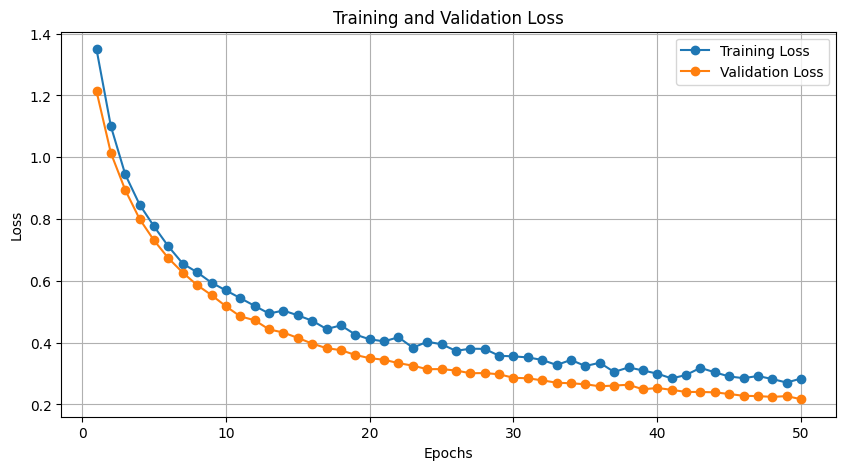

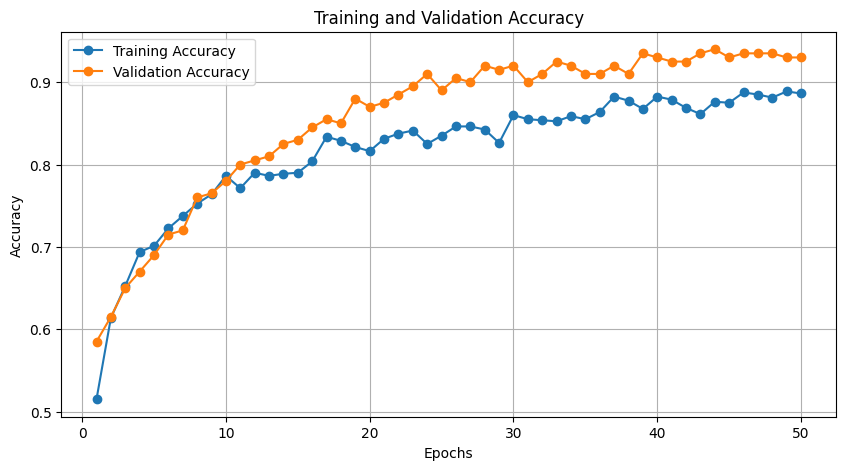

In [ ]:
# Visualization of training and validation
def plot_training_history(history):
    # Extract loss and accuracy
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Call the visualization function
plot_training_history(history)


In [ ]:
# Load the model for predictions
model = load_model("health_status_model.h5")

# User input function for predictions
def predict_health_status():
    print("Enter details to predict health status:")
    user_age = float(input("Enter Age (18-70): "))
    user_bmi = float(input("Enter BMI (15-40): "))
    user_activity = float(input("Enter Activity Level (0-10): "))

    # Prepare user input
    user_input = np.array([[user_age, user_bmi, user_activity]])
    user_input_scaled = scaler.transform(user_input)  # Scale the input

    # Make prediction
    prediction = model.predict(user_input_scaled)
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    predicted_label = encoder.inverse_transform([predicted_class])[0]  # Decode the label

    print(f"Predicted Health Status: {predicted_label}")


In [ ]:
# Test the function
predict_health_status()


Enter details to predict health status:
Enter Age (18-70): 56
Enter BMI (15-40): 27.5
Enter Activity Level (0-10): 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Health Status: Overweight
